Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import csv file containing the dataset

In [2]:
dataset = pd.read_csv("student_scores.csv")

Find dataset shape, i.e. the number of rows and columns

In [3]:
dataset.shape

(25, 2)

Retrieve the first 5 rows to see what the data looks like

In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


List statistical data

In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plot the data on a scatter graph

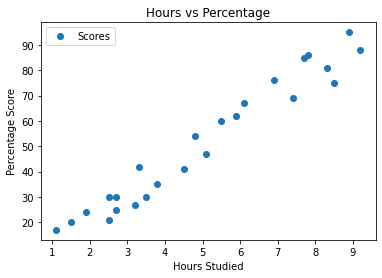

In [6]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

Preparing data. Attributes (independent variables) are stored in X and the label (dependent variables) are stored in y. Use iloc function as it retrieves data using index location. 

In [26]:
# Retrieves the 'hours' column
X = dataset.iloc[:, :-1].values

# Retrieves the 'scores' column
y = dataset.iloc[:, 1].values

Split data into training and test sets. This is done by Sci-Kit learns built in function train_test_split()

The test_size variable is where we actually specify the proportion of test set. For the purposes of this task, 80% of the data to training set while 20% of the data to test set.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the Algorithm using the training data. Import the LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Find the y-intercept

In [30]:
print(regressor.intercept_)

2.0181600414346974


Find the gradient

In [31]:
print(regressor.coef_)

[9.91065648]


Making predictions using test data.

In [32]:
# Numpy array that contains all the predicted values for the input values in the X_test set
y_pred = regressor.predict(X_test)

In [33]:
# Compare the actual output values for X_test set with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [34]:
# Evaluate the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
